In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename, 0)

Saving rich6.jpeg to rich6.jpeg


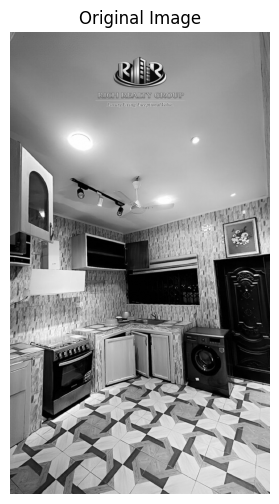

In [3]:
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

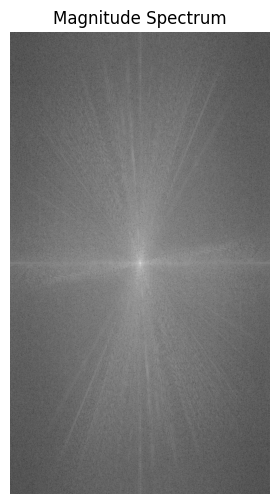

In [4]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift)+1)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()


In [5]:
rows, cols = img.shape
crow, ccol = rows//2 , cols//2

mask_lpf = np.zeros((rows, cols), np.uint8)
r = 50  # cutoff radius

for i in range(rows):
    for j in range(cols):
        if (i-crow)**2 + (j-ccol)**2 <= r*r:
            mask_lpf[i,j] = 1

In [6]:
fshift_lpf = fshift * mask_lpf

img_back_lpf = np.fft.ifftshift(fshift_lpf)
img_back_lpf = np.fft.ifft2(img_back_lpf)
img_back_lpf = np.abs(img_back_lpf)


In [7]:
mask_hpf = 1 - mask_lpf

# Apply High-Pass Filter in frequency domain
fshift_hpf = fshift * mask_hpf

# Inverse shift
img_back_hpf = np.fft.ifftshift(fshift_hpf)

# Inverse Fourier Transform
img_back_hpf = np.fft.ifft2(img_back_hpf)

# Get real magnitude
img_back_hpf = np.abs(img_back_hpf)


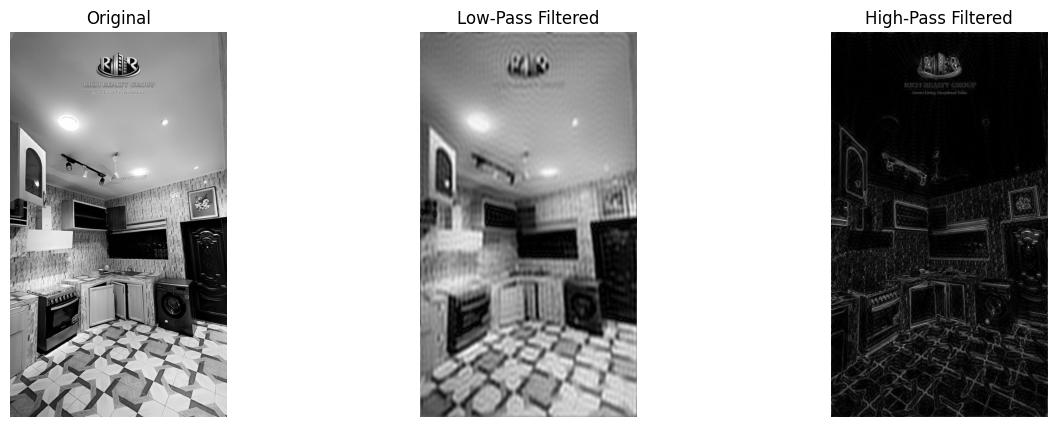

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_back_lpf, cmap='gray')
plt.title("Low-Pass Filtered")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_back_hpf, cmap='gray')
plt.title("High-Pass Filtered")
plt.axis('off')

plt.show()

